In [1]:
import urllib
from IPython.display import Image, display, clear_output
from collections import Counter

import matplotlib.pyplot as plt

import json
import numpy as np
from PIL import Image

In [2]:
import os
import h5py
import numpy as np
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.regularizers import l2, l1
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History
import tensorflow as tf

Using TensorFlow backend.


In [3]:
from keras.applications import VGG16
conv_base =VGG16(include_top=False,weights='imagenet')

W0420 21:40:17.046217  1204 deprecation.py:506] From C:\Users\adity\.conda\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0420 21:40:17.109050  1204 module_wrapper.py:139] From C:\Users\adity\.conda\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base1=tf.keras.applications.VGG16(
            weights='imagenet',
            include_top=False,
            input_shape=(150, 150, 3))

W0423 17:13:14.426043 10976 deprecation.py:506] From C:\Users\adity\.conda\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0423 17:13:14.495902 10976 module_wrapper.py:139] From C:\Users\adity\.conda\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [4]:
# import os
# import numpy as np
# from keras.preprocessing.image import ImageDataGenerator

# base_dir = ''

# train_dir = os.path.join(base_dir, 'train2014(1)')
# # validation_dir = os.path.join(base_dir, 'validation')
# # test_dir = os.path.join(base_dir, 'test')

# datagen = ImageDataGenerator(rescale=1./255)
# batch_size = 16

# def extract_features(directory, sample_count):
#     features = np.zeros(shape=(sample_count, 4, 4, 512))
#     labels = np.zeros(shape=(sample_count))
#     generator = datagen.flow_from_directory(
#         directory,
#         target_size=(150, 150),
#         batch_size=batch_size,
#         class_mode='binary')
#     i = 0
#     for inputs_batch, labels_batch in generator:
#         features_batch = conv_base.predict(inputs_batch)
#         features[i * batch_size : (i + 1) * batch_size] = features_batch
#         labels[i * batch_size : (i + 1) * batch_size] = labels_batch
#         i += 1
#         if i * batch_size >= sample_count:
#             # Note that since generators yield data indefinitely in a loop,
#             # we must `break` after every image has been seen once.
#             break
#     return features, labels

# train_features, train_labels = extract_features(train_dir, 9000)
# # validation_features, validation_labels = extract_features(validation_dir, 10)
# # test_features, test_labels = extract_features(test_dir, 10)



Found 9000 images belonging to 1 classes.


In [7]:
train_images=os.listdir('train2014')
len(train_images)

82783

In [8]:
os.chdir('train2014')

In [20]:
train_images

[]

In [33]:
train_images=train_images[34000:37000]
len(train_images)

3000

In [11]:
from PIL import Image
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
def preprocess(image_path):
    img=image.load_img(image_path,target_size=(150,150))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    x=preprocess_input(x)
    return x

In [12]:
def encode(image):
    image=preprocess(image)
    feat_vect=conv_base.predict(image)
    feat_vect=np.reshape(feat_vect,4*4*512)
    return feat_vect

In [34]:
encoding_train={}
for img in train_images:
    encoding_train[img]=encode(img)

In [24]:
len(encoding_train)

5000

In [38]:
val_images=[]
for key in encoding_train.keys():
    val_images.append(str(key))

In [50]:
pd.Series(train_images).to_csv('valNames.csv')

C:\Users\adity\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [35]:
import pickle
from pickle import dump,load
with open("encoded_34_37.pkl","wb") as encoded_pickle:
    pickle.dump(encoding_train,encoded_pickle)

In [ ]:
np.save('bottleneck_features_train.npy', train_features)

In [ ]:
train_features=np.load("bottleneck_features_train.npy")

In [ ]:
import os
import numpy as np
feature_names=os.listdir("features/")

In [ ]:
feature_list=[]
for i in feature_names:
    feature_list.append(np.load("features/"+i))

In [ ]:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

feature_list=[]
for x in range(len(train_features)):
    features_np=np.array(train_features[x])
    feature_list.append(features_np.flatten())

In [ ]:
feature_list=[]
for x in range(len(train_features)):
    features_np=np.array(train_features[x])
    feature_list.append(features_np.flatten())

In [ ]:
len(feature_list)

In [ ]:
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(feature_list, method='ward'))

In [ ]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(feature_list)
labels = model.labels_

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(feature_list)
distances, indices = nbrs.kneighbors(feature_list)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
db = DBSCAN(eps=20, min_samples=20).fit(feature_list)

In [ ]:
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


In [4]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow.keras

In [28]:


# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
class Visualise:

    def visualise_cnn(self,conv_base,photo):

        successive_outputs = [layer.output for layer in conv_base.layers[1:8]]

        #visualization_model = Model(img_input, successive_outputs)
        visualization_model = tf.keras.models.Model(inputs = conv_base.input, outputs = successive_outputs)
        
        img_path='train2014/'+photo
        img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

        x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
        x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

        # Rescale by 1/255
        x /= 255.0

        # Let's run our image through our network, thus obtaining all
        # intermediate representations for this image.
        successive_feature_maps = visualization_model.predict(x)

        # These are the names of the layers, so can have them as part of our plot
        layer_names = [layer.name for layer in conv_base.layers]

        # -----------------------------------------------------------------------
        # Now let's display our representations
        # -----------------------------------------------------------------------
        j=0
        for layer_name, feature_map in zip(layer_names, successive_feature_maps):
            
#             print(feature_map.shape)
            if len(feature_map.shape) == 4:

            #-------------------------------------------
            # Just do this for the conv / maxpool layers, not the fully-connected layers
            #-------------------------------------------
                n_features = feature_map.shape[-1]  # number of features in the feature map
                size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

                # We will tile our images in this matrix
                display_grid = np.zeros((size, size * n_features))

                #-------------------------------------------------
                # Postprocess the feature to be visually palatable
                #-------------------------------------------------
                for i in range(n_features):
                    x  = feature_map[0, :, :, i]
                    x -= x.mean()
                    x /= x.std ()
                    x *=  64
                    x += 128
                    x  = np.clip(x, 0, 255).astype('uint8')
                    display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

                #-----------------
                # Display the grid
                #-----------------

                scale = 20. / n_features
                plt.figure( figsize=(scale * n_features, scale*5) )
                plt.title ( layer_name )
                plt.grid  ( True )
                plt.imshow( display_grid, aspect='auto', cmap='gray' ) 
                plt.savefig("feat_vis{}.png".format(j),bbox_inches='tight')
                j+=1

In [29]:
v=Visualise()

C:\Users\adity\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


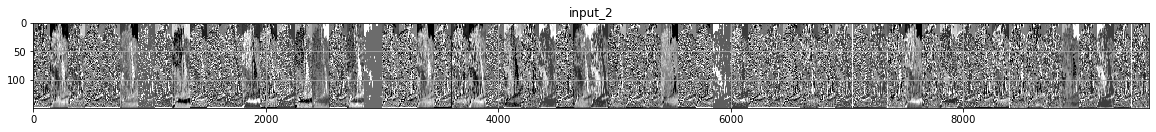

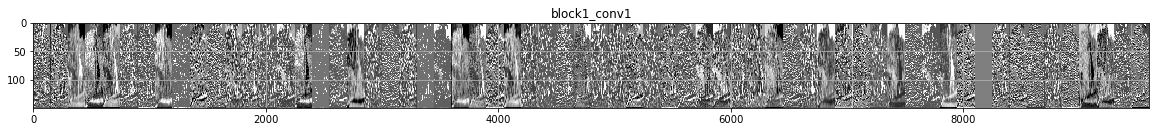

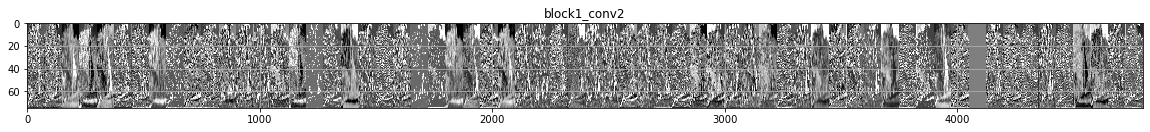

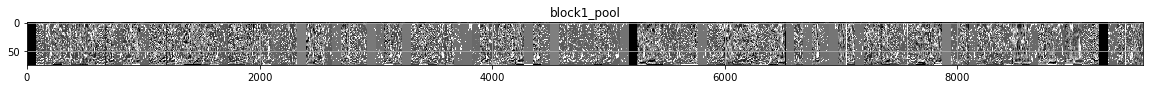

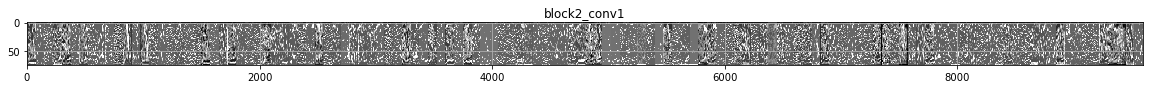

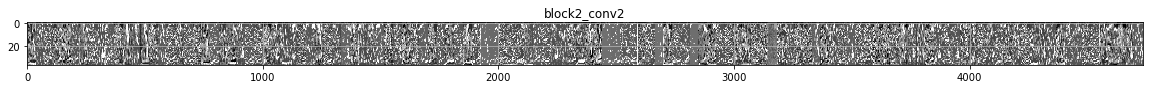

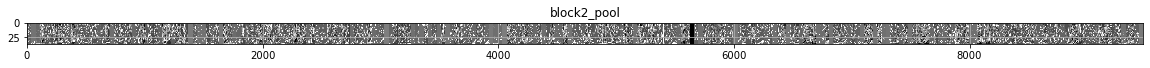

In [30]:
v.visualise_cnn(conv_base1,train_images[1])

In [31]:
from PIL import Image
im=[]
for i in range(5):
    im.append(Image.open('feat_vis{}.png'.format(i)))

In [32]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

x=0
for i in range(1,5):
    im[0]=get_concat_v(im[0],im[i])



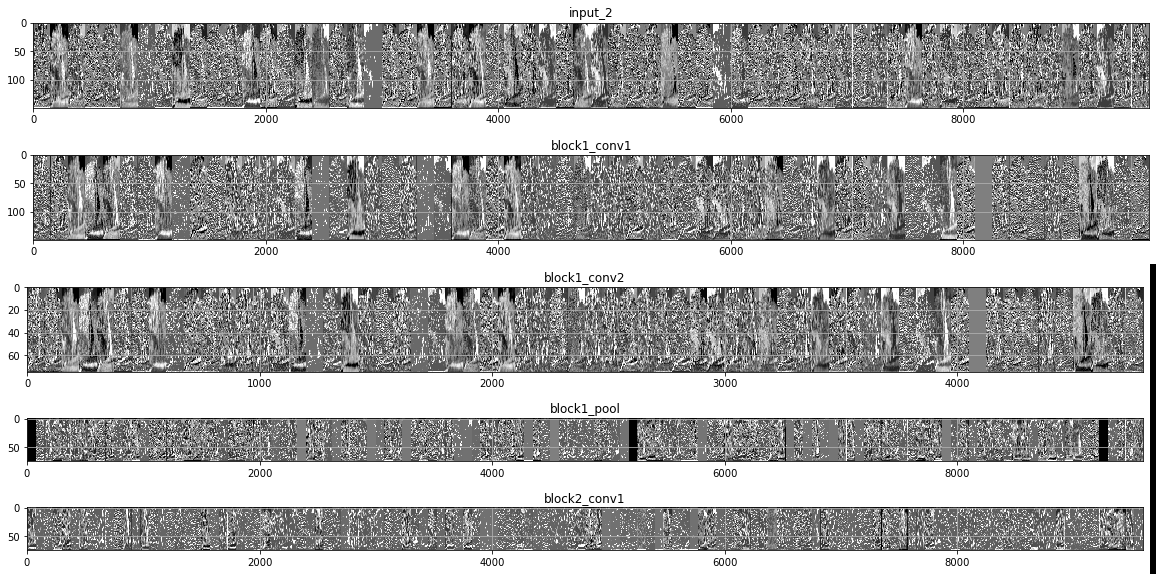

In [33]:
im[0]